In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

### バラつきのある y = 4x^3 - 3x^2 + 2x - 1 のデータを作成

x = np.random.rand(100, 1)  # 0 〜 1 までの乱数を 100 個つくる
x = x * 2 - 1               # 値の範囲を -2 〜 2 に変更

y = 4 * x**3 - 3 * x**2 + 2 * x - 1

y += np.random.randn(100, 1)  # 標準正規分布（平均 0, 標準偏差 1）の乱数を加える

# 学習データ 30 個
x_train = x[:30]
y_train = y[:30]

# テストデータ 30 個
x_test = x[30:]
y_test = y[30:]

In [2]:
X_TRAIN = np.c_[x_train**9, x_train**8, x_train**7, x_train**6, x_train**5,
                x_train**4, x_train**3, x_train**2, x_train]

In [3]:
X_TRAIN

array([[-1.41636320e-04,  3.79159461e-04, -1.01500729e-03,
         2.71716757e-03, -7.27383903e-03,  1.94720174e-02,
        -5.21264575e-02,  1.39542171e-01, -3.73553437e-01],
       [ 4.87286294e-03,  8.80434522e-03,  1.59077930e-02,
         2.87423847e-02,  5.19320736e-02,  9.38314724e-02,
         1.69535792e-01,  3.06319233e-01,  5.53461139e-01],
       [-2.22432306e-05,  7.31435237e-05, -2.40521495e-04,
         7.90918819e-04, -2.60081777e-03,  8.55239871e-03,
        -2.81232789e-02,  9.24791799e-02, -3.04103897e-01],
       [ 2.95564564e-02,  4.37099066e-02,  6.46408999e-02,
         9.55949409e-02,  1.41371682e-01,  2.09069143e-01,
         3.09184315e-01,  4.57240793e-01,  6.76195825e-01],
       [ 7.70026409e-11,  1.02382851e-09,  1.36128424e-08,
         1.80996599e-07,  2.40653405e-06,  3.19973203e-05,
         4.25436950e-04,  5.65661739e-03,  7.52104872e-02],
       [ 4.08599004e-04,  9.72343747e-04,  2.31388807e-03,
         5.50636339e-03,  1.31035024e-02,  3.118242

係数（学習データ） [[-4.83083417e+02 -9.65448194e+01  6.66058292e+02  8.14640688e+01
  -3.09355784e+02 -2.41266675e+01  5.77050080e+01  2.34002805e+00
  -3.55524051e-02]]
切片（学習データ） [-1.51388919]
決定係数（学習データ） 0.9392835266932017
決定係数（テストデータ） -8.229908565369328


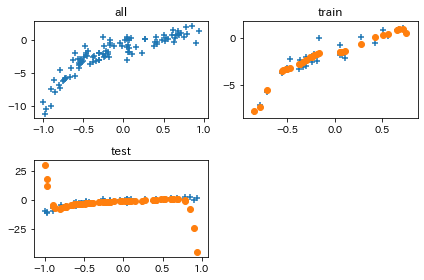

In [8]:
model = linear_model.LinearRegression()
model.fit(X_TRAIN, y_train)


### 係数、切片、学習データによる決定係数を表示

print('係数（学習データ）', model.coef_)
print('切片（学習データ）', model.intercept_)

print('決定係数（学習データ）', model.score(X_TRAIN, y_train))


### テストデータによる決定係数を表示

X_TEST = np.c_[x_test**9, x_test**8, x_test**7, x_test**6, x_test**5,
               x_test**4, x_test**3, x_test**2, x_test]

print('決定係数（テストデータ）', model.score(X_TEST, y_test))


### グラフ表示

plt.subplot(2, 2, 1)
plt.scatter(x, y, marker='+')
plt.title('all')

plt.subplot(2, 2, 2)
plt.scatter(x_train, y_train, marker='+')
plt.scatter(x_train, model.predict(X_TRAIN), marker='o')
plt.title('train')

plt.subplot(2, 2, 3)
plt.scatter(x_test, y_test, marker='+')
plt.scatter(x_test, model.predict(X_TEST), marker='o')
plt.title('test')

plt.tight_layout()